# Tic Tac Toe Game (Noughts and Crosses)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from platform import python_version

from gamelearner import *
python_version()

'3.6.6'

## Game dynamics

In [2]:
game = TicTacToeGame()
game

TicTacToeGame()

In [3]:
game.roles

[1, 2]

In [4]:
game.marks

['X', 'O']

In [5]:
game.state

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int8)

In [6]:
game.make_move((1, (0, 2)))
game.make_move((2, (0, 1)))
game.make_move((1, (1, 1)))
game.make_move((2, (2, 2)))

In [7]:
game.show_state()

_ O X
_ X _
_ _ O


In [8]:
game.check_if_game_over()

False

In [9]:
game.show_moves()

1 (1, (0, 2))
2 (2, (0, 1))
3 (1, (1, 1))
4 (2, (2, 2))


In [10]:
game.turn

1

In [11]:
game.available_moves()

[(0, 0), (1, 0), (1, 2), (2, 0), (2, 1)]

In [12]:
try:
    game.make_move((2, (2,0)))
except ValueError as err:
    print(err)

It is not player 2's turn.


In [13]:
game.make_move((1, (2,0)))
game.show_state()

_ O X
_ X _
X _ O


In [14]:
game.game_over

True

In [15]:
print(game.winner)

1


In [16]:
game.get_rewards()

{1: 1.0, 2: 0.0}

In [17]:
game.reverse_move()
game.reverse_move()

In [18]:
game.show_state()

_ O X
_ X _
_ _ _


In [19]:
game.make_move((2, (2,0)))
game.show_state()

_ O X
_ X _
O _ _


In [20]:
game.get_rewards()

{1: 0.0}

In [21]:
game.make_move((1, (1,2)))
game.show_state()

_ O X
_ X X
O _ _


In [22]:
game.make_move((2, (2,2)))
game.make_move((1, (1,0)))
game.show_state()

_ O X
X X X
O _ O


In [23]:
game.game_over, game.winner

(True, 1)

In [24]:
game.get_rewards()

{1: 1.0, 2: 0.0}

In [25]:
try:
    game.make_move((2, (2,1)))
except AssertionError as err:
    print(err)

Player 1 has already won


### Playing with Human Players

In [26]:
players = [HumanPlayer("Jill"), HumanPlayer("Jack")]
players

[HumanPlayer('Jill')), HumanPlayer('Jack'))]

In [27]:
game = TicTacToeGame()
game

TicTacToeGame()

In [28]:
game.show_state()
players[0].make_move(game, role=1)

_ _ _
_ _ _
_ _ _
Jill's turn (row, col): 0,0


In [29]:
game.show_state()
players[1].make_move(game, role=2)

X _ _
_ _ _
_ _ _
Jack's turn (row, col): 1,1


In [30]:
game.show_state()

X _ _
_ O _
_ _ _


### How a TDLearner player learns

In [31]:
game = TicTacToeGame()
game.show_state()

_ _ _
_ _ _
_ _ _


In [32]:
ex = ExpertPlayer("EX")
td = TDLearner("TD")

In [33]:
td.make_move(game, 1)
print("On-policy:", td.on_policy)
game.show_state()

On-policy: True
_ _ X
_ _ _
_ _ _


In [34]:
td.value_function

{b'S--------': 0.5,
 b'-S-------': 0.5,
 b'--S------': 0.5,
 b'---S-----': 0.5,
 b'----S----': 0.5,
 b'-----S---': 0.5,
 b'------S--': 0.5,
 b'-------S-': 0.5,
 b'--------S': 0.5}

In [35]:
game.get_rewards()

{}

In [36]:
ex.make_move(game, 2)
game.show_state()

_ _ X
_ O _
_ _ _


In [37]:
td.make_move(game, 1)
print("On-policy:", td.on_policy)
game.show_state()

On-policy: True
_ _ X
_ O X
_ _ _


In [38]:
td.value_function

{b'S--------': 0.5,
 b'-S-------': 0.5,
 b'--S------': 0.5,
 b'---S-----': 0.5,
 b'----S----': 0.5,
 b'-----S---': 0.5,
 b'------S--': 0.5,
 b'-------S-': 0.5,
 b'--------S': 0.5,
 b'S-S-O----': 0.5,
 b'-SS-O----': 0.5,
 b'--SSO----': 0.5,
 b'--S-OS---': 0.5,
 b'--S-O-S--': 0.5,
 b'--S-O--S-': 0.5,
 b'--S-O---S': 0.5}

In [39]:
ex.make_move(game, 2)
game.show_state()

_ _ X
_ O X
_ _ O


In [40]:
td.make_move(game, 1)
print("On-policy:", td.on_policy)
game.show_state()

On-policy: True
_ _ X
_ O X
X _ O


In [41]:
td.value_function

{b'S--------': 0.5,
 b'-S-------': 0.5,
 b'--S------': 0.5,
 b'---S-----': 0.5,
 b'----S----': 0.5,
 b'-----S---': 0.5,
 b'------S--': 0.5,
 b'-------S-': 0.5,
 b'--------S': 0.5,
 b'S-S-O----': 0.5,
 b'-SS-O----': 0.5,
 b'--SSO----': 0.5,
 b'--S-OS---': 0.5,
 b'--S-O-S--': 0.5,
 b'--S-O--S-': 0.5,
 b'--S-O---S': 0.5,
 b'S-S-OS--O': 0.5,
 b'-SS-OS--O': 0.5,
 b'--SSOS--O': 0.5,
 b'--S-OSS-O': 0.5,
 b'--S-OS-SO': 0.5}

In [42]:
while not game.game_over:
    ex.make_move(game, 2)
    if not game.game_over:
        td.make_move(game, 1)

In [43]:
game.show_state()

O _ X
_ O X
X _ O


In [44]:
game.game_over, game.winner

(True, 2)

In [45]:
td.value_function

{b'S--------': 0.5,
 b'-S-------': 0.5,
 b'--S------': 0.5,
 b'---S-----': 0.5,
 b'----S----': 0.5,
 b'-----S---': 0.5,
 b'------S--': 0.5,
 b'-------S-': 0.5,
 b'--------S': 0.5,
 b'S-S-O----': 0.5,
 b'-SS-O----': 0.5,
 b'--SSO----': 0.5,
 b'--S-OS---': 0.5,
 b'--S-O-S--': 0.5,
 b'--S-O--S-': 0.5,
 b'--S-O---S': 0.5,
 b'S-S-OS--O': 0.5,
 b'-SS-OS--O': 0.5,
 b'--SSOS--O': 0.5,
 b'--S-OSS-O': 0.5,
 b'--S-OS-SO': 0.5}

In [46]:
rewards = game.get_rewards()
rewards

{2: 1.0, 1: 0.0}

In [47]:
td.reward(game, 1, rewards[1])
td.value_function

{b'S--------': 0.5,
 b'-S-------': 0.5,
 b'--S------': 0.5,
 b'---S-----': 0.5,
 b'----S----': 0.5,
 b'-----S---': 0.5,
 b'------S--': 0.5,
 b'-------S-': 0.5,
 b'--------S': 0.5,
 b'S-S-O----': 0.5,
 b'-SS-O----': 0.5,
 b'--SSO----': 0.5,
 b'--S-OS---': 0.375,
 b'--S-O-S--': 0.5,
 b'--S-O--S-': 0.5,
 b'--S-O---S': 0.5,
 b'S-S-OS--O': 0.5,
 b'-SS-OS--O': 0.5,
 b'--SSOS--O': 0.5,
 b'--S-OSS-O': 0.0,
 b'--S-OS-SO': 0.5}

## Using the game controller

In [48]:
game = TicTacToeGame()
players = [ExpertPlayer("EXP1"), ExpertPlayer("EXP2")]

In [49]:
ctrl = GameController(game, players)
ctrl

GameController(TicTacToeGame(), [ExpertPlayer('EXP1'), ExpertPlayer('EXP2')])

In [50]:
ctrl.player_roles

{ExpertPlayer('EXP1'): 1, ExpertPlayer('EXP2'): 2}

In [51]:
ctrl.play()

Game of Tic Tac Toe with 2 players ['EXP1', 'EXP2']
_ _ _
_ _ _
_ _ _
EXP1's turn (row, col): (1, (2, 2))
_ _ _
_ _ _
_ _ X
EXP2's turn (row, col): (2, (1, 1))
_ _ _
_ O _
_ _ X
EXP1's turn (row, col): (1, (2, 0))
_ _ _
_ O _
X _ X
EXP2's turn (row, col): (2, (2, 1))
_ _ _
_ O _
X O X
EXP1's turn (row, col): (1, (0, 1))
_ X _
_ O _
X O X
EXP2's turn (row, col): (2, (1, 0))
_ X _
O O _
X O X
EXP1's turn (row, col): (1, (1, 2))
_ X _
O O X
X O X
EXP2's turn (row, col): (2, (0, 2))
_ X O
O O X
X O X
EXP1's turn (row, col): (1, (0, 0))
X X O
O O X
X O X
Game over!
Draw


## Competition between computer players

In [52]:
game = TicTacToeGame()
players = [TDLearner('TD1'), ExpertPlayer('EXPERT')]
ctrl = GameController(game, players)

In [53]:
ctrl.play()

Game of Tic Tac Toe with 2 players ['TD1', 'EXPERT']
_ _ _
_ _ _
_ _ _
TD1's turn (row, col): (2, 1)
_ _ _
_ _ _
_ X _
EXPERT's turn (row, col): (2, (1, 1))
_ _ _
_ O _
_ X _
TD1's turn (row, col): (1, 0)
_ _ _
X O _
_ X _
EXPERT's turn (row, col): (2, (2, 0))
_ _ _
X O _
O X _
TD1's turn (row, col): (0, 1)
_ X _
X O _
O X _
EXPERT's turn (row, col): (2, (0, 2))
_ X O
X O _
O X _
Game over!
EXPERT won


In [54]:
for player in players:
    print("\nPlayer %s" % str(player.name))
    print("  played: %d, wins: %d, losses: %d" % (player.games_played, player.games_won, player.games_lost))


Player TD1
  played: 1, wins: 0, losses: 1

Player EXPERT
  played: 1, wins: 1, losses: 0


## Train a TD Learner

In [55]:
td_learner = TDLearner('TD1')
computer_players = [td_learner, ExpertPlayer('EXPERT')]

In [56]:
train_computer_players(computer_players)


Training 2 computer players...
0 games completed
100 games completed
200 games completed
300 games completed
400 games completed
500 games completed
600 games completed
700 games completed
800 games completed
900 games completed

Results:
TD1: won 0, lost 302, drew 698
EXPERT: won 302, lost 0, drew 698


In [57]:
train_computer_players(computer_players)


Training 2 computer players...
0 games completed
100 games completed
200 games completed
300 games completed
400 games completed
500 games completed
600 games completed
700 games completed
800 games completed
900 games completed

Results:
TD1: won 0, lost 179, drew 821
EXPERT: won 179, lost 0, drew 821


## Now play against the computer!

In [58]:
game = TicTacToeGame()
players = [HumanPlayer("You"), td_learner]
ctrl = GameController(game, players)

In [59]:
while True:
    game.reset()
    ctrl.play()
    text = input("Press enter to play again or q to quit: ")
    if text.strip().lower() == 'q':
        break

print("Results")        
for player in players:
    print("\nPlayer %s" % str(player.name))
    print("  played: %d, wins: %d, losses: %d" % (player.games_played, player.games_won, player.games_lost))

Game of Tic Tac Toe with 2 players ['You', 'TD1']
_ _ _
_ _ _
_ _ _
You's turn (row, col): 0,0
X _ _
_ _ _
_ _ _
TD1's turn (row, col): (2, 2)
X _ _
_ _ _
_ _ O
You's turn (row, col): 0,2
X _ X
_ _ _
_ _ O
TD1's turn (row, col): (1, 0)
X _ X
O _ _
_ _ O
You's turn (row, col): 0,1
You you won!
X X X
O _ _
_ _ O
Game over!
You won
Press enter to play again or q to quit: q
Results

Player You
  played: 1, wins: 1, losses: 0

Player TD1
  played: 2001, wins: 0, losses: 482


## TD Parameter Optimization

In [60]:
results = {
    'learning_rate': [],
    'off_policy_rate': [],
    'initial_values': [],
    'Wins (1000)': [],
    'Losses (1000)': [],
    'Wins (2000)': [],
    'Losses (2000)': []
}

In [61]:
initial_values = [0.0, 0.5, 1.0]
learning_rates = [0.25, 0.1, 0.0]
off_policy_rates = [0.0, 0.1]

In [62]:
for lr in learning_rates:
    for opr in off_policy_rates:
        for v0 in initial_values:
            print("\nlr: %s, opr: %s, v0: %s" % (str(lr), str(opr), str(v0)))
            print("Training against expert...")
            td_learner = TDLearner('TD', learning_rate=lr, 
                                   off_policy_rate=opr, initial_value=v0)
            computer_players = [td_learner, ExpertPlayer('EXPERT')]
            train_computer_players(computer_players, show=False)
            results['learning_rate'].append(lr)
            results['off_policy_rate'].append(opr)
            results['initial_values'].append(v0)
            results['Wins (1000)'].append(td_learner.games_won)
            results['Losses (1000)'].append(td_learner.games_lost)
            train_computer_players(computer_players, show=False)
            results['Wins (2000)'].append(td_learner.games_won)
            results['Losses (2000)'].append(td_learner.games_lost)


lr: 0.25, opr: 0.0, v0: 0.0
Training against expert...

lr: 0.25, opr: 0.0, v0: 0.5
Training against expert...

lr: 0.25, opr: 0.0, v0: 1.0
Training against expert...

lr: 0.25, opr: 0.1, v0: 0.0
Training against expert...

lr: 0.25, opr: 0.1, v0: 0.5
Training against expert...

lr: 0.25, opr: 0.1, v0: 1.0
Training against expert...

lr: 0.1, opr: 0.0, v0: 0.0
Training against expert...

lr: 0.1, opr: 0.0, v0: 0.5
Training against expert...

lr: 0.1, opr: 0.0, v0: 1.0
Training against expert...

lr: 0.1, opr: 0.1, v0: 0.0
Training against expert...

lr: 0.1, opr: 0.1, v0: 0.5
Training against expert...

lr: 0.1, opr: 0.1, v0: 1.0
Training against expert...

lr: 0.0, opr: 0.0, v0: 0.0
Training against expert...

lr: 0.0, opr: 0.0, v0: 0.5
Training against expert...

lr: 0.0, opr: 0.0, v0: 1.0
Training against expert...

lr: 0.0, opr: 0.1, v0: 0.0
Training against expert...

lr: 0.0, opr: 0.1, v0: 0.5
Training against expert...

lr: 0.0, opr: 0.1, v0: 1.0
Training against expert...


In [63]:
df = pd.DataFrame(results)
df

,learning_rate,off_policy_rate,initial_values,Wins (1000),Losses (1000),Wins (2000),Losses (2000)
0,0.25,0.0,0.0,0,358,0,404
1,0.25,0.0,0.5,0,132,0,132
2,0.25,0.0,1.0,0,130,0,130
3,0.25,0.1,0.0,0,446,0,651
4,0.25,0.1,0.5,0,304,0,439
5,0.25,0.1,1.0,0,269,0,425
6,0.10,0.0,0.0,0,310,0,349
7,0.10,0.0,0.5,0,93,0,93
8,0.10,0.0,1.0,0,140,0,140
9,0.10,0.1,0.0,0,482,0,695


In [64]:
good_results = {
    'After 1000 iterations:': df['Losses (1000)'].idxmin(),
    'After 2000 iterations:': df['Losses (2000)'].idxmin()
}
good_results

{'After 1000 iterations:': 7, 'After 2000 iterations:': 7}

## Look at learning rates

In [65]:
td_players = [TDLearner("TD %d" % i, learning_rate=0.1) for i in range(4)]
rd = RandomPlayer("Random")
ex = ExpertPlayer("Expert")

opponents = [rd, ex, td_players[3]]

In [66]:
td_players[0:3], opponents

([TDLearner('TD 0'), TDLearner('TD 1'), TDLearner('TD 2')],
 [RandomPlayer('Random'), ExpertPlayer('Expert'), TDLearner('TD 3')])

In [67]:
import datetime

# This can take a long time!
start_time = datetime.datetime.now()
print("Start time:", start_time)

scores = {}
index = []
n_iter = 500

def player_key(p1, p2):
    return "%s vs. %s" % (p1.name, p2.name)

for td_player, opponent in zip(td_players[0:3], opponents):
    scores[player_key(td_player, opponent)] = [test_player(td_player)]
scores[ex.name] = [test_player(ex)]

index.append(td_player.games_played)

iteration = 0
iterations = [0]

for epoch in range(50):
    
    for td_player, opponent in zip(td_players[0:3], opponents):
        train_computer_players([td_player, opponent], iterations=n_iter,
                               show=False)
        key = "%s vs. %s" % (td_player.name, opponent.name)
        scores[key].append(test_player(td_player))
    scores[ex.name].append(test_player(ex))

    index.append(td_player.games_played)
    iteration += n_iter
    iterations.append(iteration)
    print(iteration, "%5.2f %5.2f %5.2f %5.2f" % tuple(s[-1] for s in 
                                                     scores.values()))

print("End time:", datetime.datetime.now() - start_time)

Start time: 2018-10-07 14:49:52.107251
500  0.06  0.28  0.04  0.94
1000  0.17  0.34  0.11  0.96
1500  0.46  0.32  0.07  0.96
2000  0.18  0.29  0.07  1.00
2500  0.26  0.27  0.12  1.00
3000  0.39  0.33  0.01  0.94
3500  0.53  0.30  0.04  0.96
4000  0.49  0.29  0.08  0.96
4500  0.44  0.26  0.15  0.98
5000  0.51  0.39  0.22  0.90
5500  0.55  0.39  0.23  0.96
6000  0.56  0.40  0.20  1.00
6500  0.54  0.25  0.16  0.96
7000  0.55  0.31  0.23  0.98
7500  0.59  0.40  0.24  0.96
8000  0.63  0.26  0.09  0.98
8500  0.58  0.31  0.09  0.96
9000  0.64  0.24  0.09  0.92
9500  0.60  0.33  0.09  0.92
10000  0.63  0.35  0.12  0.92
10500  0.55  0.26  0.17  0.92
11000  0.61  0.41  0.18  1.00
11500  0.48  0.24  0.10  0.94
12000  0.65  0.32  0.23  0.96
12500  0.63  0.36  0.17  0.96
13000  0.55  0.31  0.19  0.94
13500  0.57  0.35  0.21  1.00
14000  0.54  0.30  0.20  0.90
14500  0.62  0.19  0.24  0.94
15000  0.49  0.34  0.37  0.98
15500  0.59  0.32  0.31  0.96
16000  0.66  0.38  0.24  0.96
16500  0.54  0.44  0.

In [68]:
pd.DataFrame(scores, index=index).head()

,TD 0 vs. Random,TD 1 vs. Expert,TD 2 vs. TD 3,Expert
0,0.014784,0.027840,0.02128,0.96
500,0.055056,0.278784,0.04320,0.94
1000,0.165376,0.339264,0.11136,0.96
1500,0.458208,0.315392,0.06912,0.96
2000,0.178432,0.289952,0.06552,1.00


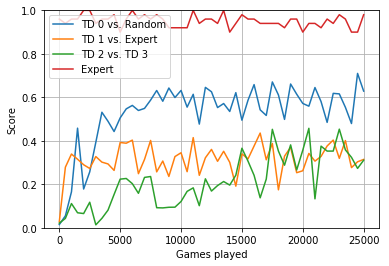

In [69]:
pd.DataFrame(scores, index=iterations).plot()
plt.xlabel("Games played")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid()
plt.savefig("learning_rates.pdf")

In [70]:
[p.games_played for p in td_players]

[25000, 25000, 25000, 25000]

In [71]:
games_lost = td_players[1].games_lost
players = [td_players[1], ExpertPlayer("EX1")]
train_computer_players(players, iterations=25000, show=False)
games_lost = td_players[1].games_lost - games_lost
print("Games lost against expert:", games_lost)

Games lost against expert: 3891


In [72]:
td_players[1].games_played

50000

In [73]:
len(td_players[1].value_function)

3961

In [74]:
pd.Series(td_players[1].value_function).value_counts().head(10)

0.50000    3056
0.00000     528
2.50000      17
0.37500      15
2.50000      15
2.50000      14
1.00000      10
2.50000       9
1.37500       6
2.41553       5
dtype: int64

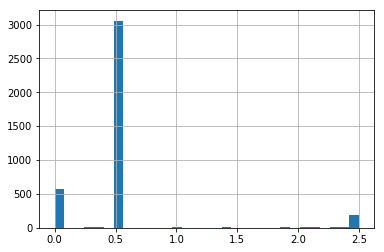

In [75]:
pd.Series(td_players[1].value_function).hist(bins=31)

In [76]:
sum([test_player(td_players[1]) for i in range(10)])/10

0.2520352